In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from random import shuffle
import random


def divup(a, b):
    return (a + b - 1) / b

def imshow_bgr(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

Collected 8677 files
['blur_detection/caltech101/Motorbikes/image_0345.jpg', 'blur_detection/caltech101/okapi/image_0005.jpg', 'blur_detection/caltech101/lotus/image_0043.jpg', 'blur_detection/caltech101/wrench/image_0016.jpg', 'blur_detection/caltech101/crayfish/image_0040.jpg', 'blur_detection/caltech101/ibis/image_0056.jpg', 'blur_detection/caltech101/flamingo/image_0057.jpg', 'blur_detection/caltech101/Leopards/image_0118.jpg', 'blur_detection/caltech101/cougar_face/image_0008.jpg', 'blur_detection/caltech101/Faces/image_0112.jpg', 'blur_detection/caltech101/lamp/image_0020.jpg', 'blur_detection/caltech101/pizza/image_0019.jpg', 'blur_detection/caltech101/crayfish/image_0026.jpg', 'blur_detection/caltech101/cannon/image_0022.jpg', 'blur_detection/caltech101/watch/image_0195.jpg', 'blur_detection/caltech101/crayfish/image_0057.jpg']


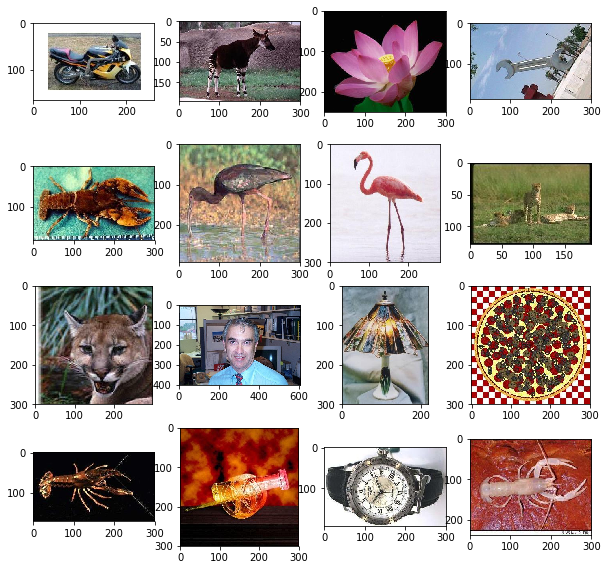

In [96]:
names = list(sorted(glob("blur_detection/caltech101/*/*.jpg")))
print("Collected {} files".format(len(names)))
shuffle(names)

sample_size = 16
names = names[:sample_size]
print(names)

imgs = [cv2.imread(name, cv2.IMREAD_COLOR) for name in names]
sqrt_ss = int(np.sqrt(sample_size))
grid_dims = (sqrt_ss, divup(sample_size, sqrt_ss))
fig = plt.figure(figsize=(10, 10))
for i, img in enumerate(imgs):
    fig.add_subplot(*grid_dims, i + 1)
    imshow_bgr(img)
plt.show()

In [97]:
def gaus_blur(img, sigma=5, r=25):
    return cv2.GaussianBlur(img, (r, r), sigma)

def motion_blur(img, x=3, y=3, reverse=False):
    box = np.zeros((y, x), np.float32)
    cv2.line(box, (0, 0), (x, y), 1, 3)
    box /= np.sum(box)
    if reverse:
        box = np.fliplr(box)
    img = cv2.filter2D(img, cv2.CV_32F, box)
    return img.astype(np.uint8)

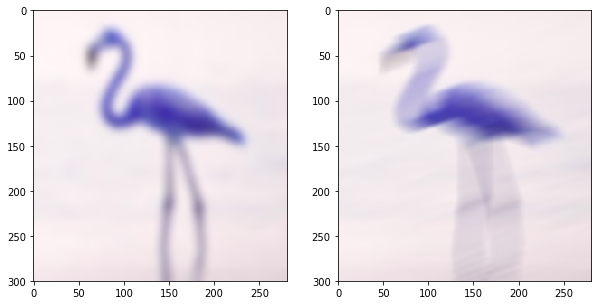

In [98]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(gaus_blur(imgs[6]))

fig.add_subplot(1, 2, 2)
plt.imshow(motion_blur(imgs[6], 40, 15, True))

In [108]:
names = list(sorted(glob("blur_detection/caltech101/*/*.jpg")))
print("Collected {} files".format(len(names)))
shuffle(names)

sample_size = 200
names = names[:sample_size]
print(names)

imgs = [cv2.imread(name, cv2.IMREAD_COLOR) for name in names]

Collected 8677 files
['blur_detection/caltech101/airplanes/image_0761.jpg', 'blur_detection/caltech101/laptop/image_0003.jpg', 'blur_detection/caltech101/revolver/image_0082.jpg', 'blur_detection/caltech101/Leopards/image_0078.jpg', 'blur_detection/caltech101/brain/image_0031.jpg', 'blur_detection/caltech101/watch/image_0224.jpg', 'blur_detection/caltech101/Motorbikes/image_0282.jpg', 'blur_detection/caltech101/metronome/image_0027.jpg', 'blur_detection/caltech101/chair/image_0027.jpg', 'blur_detection/caltech101/Faces_easy/image_0016.jpg', 'blur_detection/caltech101/Faces_easy/image_0240.jpg', 'blur_detection/caltech101/euphonium/image_0044.jpg', 'blur_detection/caltech101/scorpion/image_0083.jpg', 'blur_detection/caltech101/hawksbill/image_0086.jpg', 'blur_detection/caltech101/Motorbikes/image_0435.jpg', 'blur_detection/caltech101/ibis/image_0026.jpg', 'blur_detection/caltech101/Motorbikes/image_0677.jpg', 'blur_detection/caltech101/sea_horse/image_0036.jpg', 'blur_detection/caltech1

In [117]:
for i, img in enumerate(imgs):
    gauss_r = random.randint(2, 15) * 2 + 1
    gauss_s = np.sqrt(gauss_r)
    x_shift = random.randint(1, 25)
    y_shift = random.randint(1, 25)
    reverse_shift = random.randint(0, 1) > 0
    
    img_g = gaus_blur(img, gauss_s, gauss_r)
    img_m = motion_blur(img_g, x_shift, y_shift, reverse_shift)

    cv2.imwrite("blur_detection/data/blur/{}_g.png".format(i), img_g)
    cv2.imwrite("blur_detection/data/blur/{}_m.png".format(i), img_m)
    cv2.imwrite("blur_detection/data/original/{}.png".format(i), img)